# Book Recommendation Engine

In [9]:
# import libraries
import pandas as pd
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD 
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from surprise import Reader, Dataset
import numpy as np



In [10]:
# load datasets
books = pd.read_csv('data/Books.csv')

/Users/addingtongraham/opt/anaconda3/envs/keras-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
# drop unnecessary columns
books = books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)

In [12]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [13]:
ratings = pd.read_csv('data/Ratings.csv')

In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [16]:
users = pd.read_csv('data/Users.csv')

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


## EDA

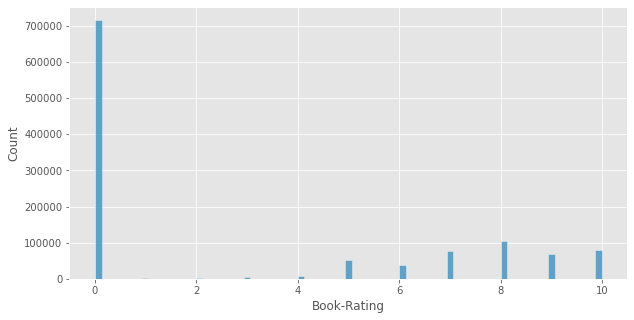

In [23]:
# ratings distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=ratings['Book-Rating'])

In [24]:
# how many different values
ratings['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [38]:
# filter out rare books and users to reduce dimensionality
min_book_ratings = 25
filter_books = ratings['ISBN'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

In [39]:
min_user_ratings = 25
filter_users = ratings['User-ID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

In [40]:
df_new = ratings.loc[(ratings['ISBN'].isin(filter_books)) & (ratings['User-ID'].isin(filter_users))]
print(f'The original data frame shape: {ratings.shape}')
print(f'the new data frame shape: {df_new.shape}')

The original data frame shape: (1149780, 3)
the new data frame shape: (243579, 3)


In [41]:
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(df_new[['User-ID', 'ISBN', 'Book-Rating']], reader)

In [42]:
# SVD
cv_svd = cross_validate(SVD(), data, measures=['RMSE'], cv=3, verbose=False)

In [43]:
cv_svd

{'test_rmse': array([3.56247201, 3.56395815, 3.55959628]),
 'fit_time': (6.938821792602539, 7.191236257553101, 7.027790784835815),
 'test_time': (0.45926904678344727, 0.4456961154937744, 0.44600605964660645)}